# Final Exam - CSC 459/559

### On the test, you are allowed to use:
- the textbook
- your personal notes
- any previous materials posted for the class on D2L
- any assignments you’ve turned in
- online documentation from sklearn.

### Note: when you turn in your notebook, restart the kernel and re-run all cells one last time, and be sure to leave the output displayed.

In [2]:
# import the necessary modules for your code
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib qt

# Problem 1 - Regression

In this problem you will use a neural network to estimate stock price highs.

In [3]:
# C
# Read in the stock information from the file
stock_info = np.loadtxt("all_stocks_5yr.csv", delimiter=",", dtype=str)

# Display the first five lines of the data array
print(stock_info[:5])

# Remove the header line from stock_info
stock_info = np.delete(stock_info, 0, 0)

# Find the unique stock ticker symbols
stock_names = np.unique(stock_info[:, 6])

# Print the number of different companies
print("\nThe number of unique stock ticker symbols is: " + str(len(stock_names)))

# Print the first 10 stock ticker symbols
print(stock_names[:10])

[['date' 'open' 'high' 'low' 'close' 'volume' 'Name']
 ['2013-02-08' '15.07' '15.12' '14.63' '14.75' '8407500' 'AAL']
 ['2013-02-11' '14.89' '15.01' '14.26' '14.46' '8882000' 'AAL']
 ['2013-02-12' '14.45' '14.51' '14.1' '14.27' '8126000' 'AAL']
 ['2013-02-13' '14.3' '14.94' '14.25' '14.66' '10259500' 'AAL']]

The number of unique stock ticker symbols is: 505
['A' 'AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI']


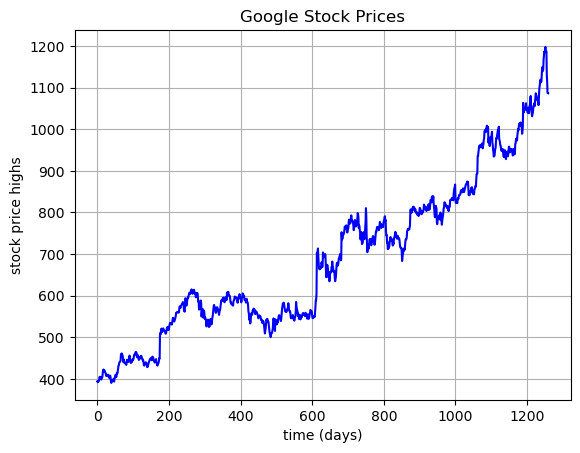

In [4]:
#C 
# Get the prices of the daily highs for Google (GOOGL)
# NOTE: remember to convert values to float!
filteredData = stock_info[:, 6]
googleIndexes = np.where(filteredData == 'GOOGL')
googleDatesAndPrices = np.array(stock_info)[googleIndexes][:, 0:5]
for index in range(len(googleDatesAndPrices)):
    googleDatesAndPrices[index][0] = np.datetime64(googleDatesAndPrices[index][0]).astype('long')
days = np.linspace(0, len(googleDatesAndPrices), len(googleDatesAndPrices), dtype=int)
prices = googleDatesAndPrices[:, 2].astype(float)

# Plot the daily highs
plt.plot(days, prices, c='blue', label='Daily High - Google')

plt.grid()
plt.xlabel('time (days)')
plt.ylabel('stock price highs')
plt.title('Google Stock Prices')

# Create an array starting at 0 and going up to the number of days for which you have price data
# e.g. 0,1,...,1258
X = days
# NOTE: this will act as X in your regression, while the prices will act as y

In [5]:
#C
# Use a neural network to perform regression-----------------
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, prices)

# Standardize the data 
# NOTE: remember to do this to both training and test

# X train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1))

# X test
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test.reshape(-1, 1))

# Train a neural net based regression model with hidden layers of size = (1000,500,100,100) and 100 iterations
regr = MLPRegressor(max_iter=100, hidden_layer_sizes=[1000, 500, 100, 100]).fit(X_train_scaled, y_train_scaled)

# Use the neural net to predict the output values corresponding to X_test
result = regr.predict(X_test_scaled)


c:\Users\NoahJohnson\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


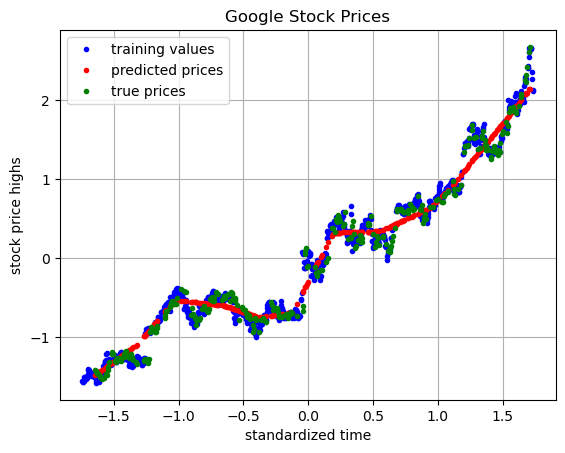

In [6]:

# Plot the training data w/ blue dots
plt.plot(X_train_scaled,y_train_scaled,'b.')
# Plot the predicted values for the test data with red dots
plt.plot(X_test_scaled,result, 'r.')
# Plot the true values of the test data with green dots
plt.plot(X_test_scaled, y_test_scaled, 'g.')
plt.grid()
plt.xlabel('standardized time')
plt.ylabel('stock price highs')
plt.title('Google Stock Prices')
plt.legend(('training values','predicted prices','true prices'))

In [7]:
from sklearn.metrics import mean_absolute_error

#C
# Use sklearn to calculate the mean absolute error, and print the results
mean_error = mean_absolute_error(y_test_scaled, result)
print(mean_error)

0.11908885248176948


In [8]:
# C
# Write your own code "from scratch" to calculate the mean absolute error, and print the results 
# (this should be the same as sklearn's)
def my_mean_abs_error(y_true, y_predicted):
    total_entries = len(y_true)
    total_error = 0
    for i in range(len(y_predicted)):
        total_error += abs(y_true[i] - y_predicted[i])
    return total_error / total_entries

print(my_mean_abs_error(y_test_scaled, result))

[0.11908885]


# Problem 2 - Classification
In this problem you will use an SVM to classify the moons dataset

In [9]:
# Use the moons dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.15, random_state=3)

In [10]:
# Split the dataset into 70% training and 30% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=10)

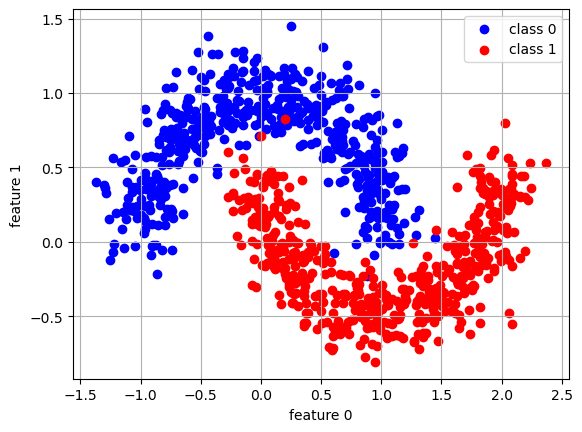

In [11]:
#C
# Plot the training data - use a different marker color for the two classes
plt.figure()
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='b')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='r')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(('class 0','class 1'))
plt.grid()

In [12]:
# C
# Create a Support Vector Machine and train it, and print the resulting accuracy of the
# model on the training and validation data
from sklearn.svm import SVC
clf = SVC().fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test,y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.993


In [13]:
#C
# find the predicted results
y_pred = clf.predict(X_test)

# find the indices of the points where the predicted values were incorrect and print them
incorrect_indices = []
for x in range(len(y_pred)):
    if y_pred[x] != y_test[x]:
        incorrect_indices.append(x)
print(incorrect_indices)

[228, 262]


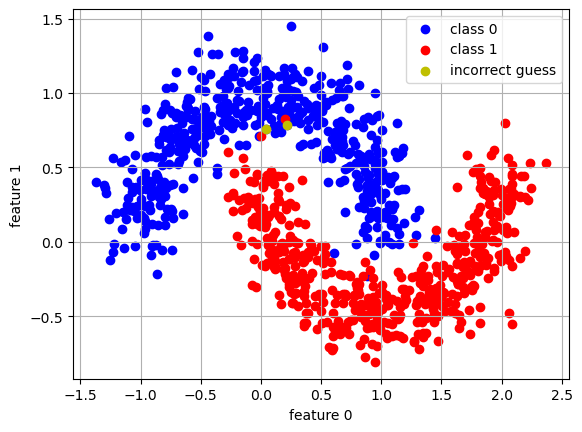

In [14]:
# C
# Plot the training data - use a different marker color for the two classes
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='b')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='r')
# Plot the incorrectly predicted points in red (don't bother to plot correctly predicted points)
plt.scatter(X[incorrect_indices][:,0], X[incorrect_indices][:, 1], c='y')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(('class 0','class 1', 'incorrect guess'))
plt.grid()

# Problem 3 - Clustering
Using the same moons dataset as in Problem 2, use DBSCAN to obtain a clustering with rand score > 0.8, using all of the original points in X, with no noise points

0.9082102102102102


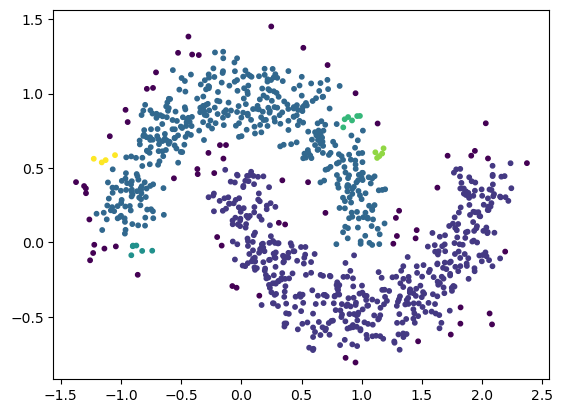

In [15]:
#C
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import rand_score


# use DBSCAN to cluster X
dbscan = DBSCAN(0.1)
clustering = dbscan.fit_predict(X)

# plot the results of the clustering, showing each cluster in a different color
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=clustering, s=10)

# print the rand score between y and the clustering labels
print(rand_score(y, clustering)) 

# Problem 4 - Performance Metrics
In this problem you'll create a ROC curve and predict a threshold probability corresponding to a maximum allowable number of false negatives.

In [16]:
# use the moons dataset, do a train-test split, and train a random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=1000, noise=0.35, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=10)
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=0)

In [17]:
#C
# use the previously trained random forest to predict the labels from the test set
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test)
# use sklearn to calculate and print the confusion matrix for the test set
conf_mx = confusion_matrix(y_test, y_pred)
print(conf_mx)

[[138  16]
 [ 18 128]]


In [18]:
#C
# use sklearn to calculate the false pos. rate, the true pos. rate (aka 'recall'), and the corresponding
# probability thresholds for class 1
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

0.0684931506849315


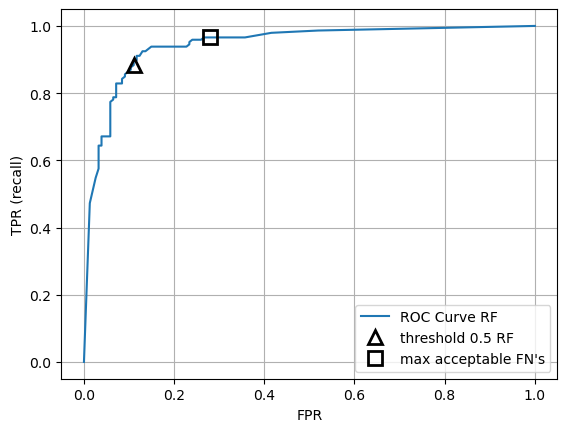

In [19]:
#C
# plot the ROC curve
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# plot the point on the curve corresponding to a 50% prob. threshold for class 1
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

# assume we're willing to tolerate a maximum of 10 False Positives
max_num_FP = 10

# using the confusion matrix, calculate the corresponding max. allowable False Positive Rate, and print that
max_fpr = max_num_FP / (conf_mx[1][1] + conf_mx[1][0])
print(max_fpr)

# find the point closest to that on the ROC curve, and indicate it the same way we indicated the 50% prob. 
# threshold above
point = np.argmin(np.abs(thresholds_rf - max_fpr))
plt.plot(fpr_rf[point], tpr_rf[point], 's', markersize=10,
         label="max acceptable FN's", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)
plt.grid()